In [13]:
using LinearAlgebra
using SparseArrays
using Plots
using Polynomials

In [9]:
function BVP1D(L::Float64,c::Float64,d::Float64,x::Vector{Float64})
    # Purpose: Solve second-order boundary value problem using FEM.
    # Author(s): Clara Hollenbeck
    # INPUT PARAMETERS
    # L : Domain length
    # c : Left boundary condition
    # d : Right boundary condition
    # x : 1D mesh vector x(1:{M})
    
    ## GLOBAL ASSEMBLY
    # Assemble A (the upper triangle only) and b. (Algorithm 1)
    M = length(x)
    A = spzeros(M,M)
    b = zeros(M)

    for i = 1:(M-1)
        h = x[i+1] - x[i]
        k1 = 1/h + h/3
        k2 = -1/h + h/6
    
        A[i,i] += k1
        A[i, i+1] += k2
        A[i+1, i] += k2
        A[i+1,i+1] += k1
    end
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0

    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end

function UBVP1D(L::Float64,c::Float64,d::Float64,M::UInt32)
    #Uniform version of the function above.
    x = LinRange(0,L,M)
    h = L/(M-1)
    A = spzeros(M,M)
    b = zeros(M)

    for i = 1:(M-1)
        k1 = 1/h + h/3
        k2 = -1/h + h/6
    
        A[i,i] += k1
        A[i, i+1] += k2
        A[i+1, i] += k2
        A[i+1,i+1] += k1
    end
    
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0
 
    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end




UBVP1D (generic function with 1 method)

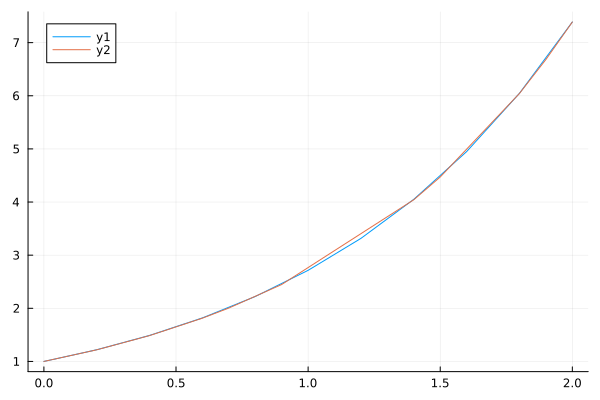

In [12]:
x = [0.0, 0.2, 0.4, 0.6, 0.7, 0.9, 1.4, 1.5, 1.8, 1.9, 2.0]


u1 = UBVP1D(2, 1, exp(2), 11)
u2 = BVP1D(2, 1, exp(2), x)

plot(LinRange(0,2,11), u1)
plot!(x,u2)

In [106]:
function uhat(x::Float64,u::Vector{Float64}, xs::Vector{Float64})
    #Evaluates the uhat function in x
    # u is the array of the approximated u values.
    # x is the value where we want to evaluate the function.
    idx = max(searchsortedfirst(xs, x) - 1, 1)

    h = xs[idx + 1] - xs[idx]
    N1 = (1 - (x - xs[idx])/h)
    N2 = (x - xs[idx])/h

    return u[idx]*N1 + u[idx + 1]*N2
end

function uhat(x::Vector{Float64}, u::Vector{Float64}, xs::Vector{Float64})
    return uhat.(x, Ref(u), Ref(xs))
end



uhat (generic function with 3 methods)

In [112]:
function ConvertionDegree(L::Float64,c::Float64,d::Float64,N::UInt64)
    x = collect(LinRange(0,L,10000))
    errors = zeros(N-3)
    dist = zeros(N-3)
    for i=4:N
        dist[i-3] = L/(i-1)
        u = UBVP1D(L, c, d, i)
        xs = collect(LinRange(0,L,i))
        uhats = uhat(x, u, xs)
 
        errors[i-3] = maximum(abs,uhats - exp.(x))
    end

    plot(dist, errors, xaxis=:log10, yaxis=:log10)

    p = coeffs(fit(log10.(dist[50:(N-3)]), log10.(errors[50:(N-3)]), 1))[2]

    return p
end

ConvertionDegree (generic function with 1 method)

In [114]:
p = ConvertionDegree(2, 1, exp(2), 10000)

print(p)

2.0006507572861456